In [30]:
import GetOldTweets3 as got
import matplotlib.pyplot as plt
import pandas as pd
import re
from textblob import TextBlob

In [16]:
# Function that pulls tweets based on a general search query and turns to a dataframe

# Parameters: (text query you want to search), (max number of most recent tweets to pull from)
def text_query_to_df(text_query, count):
    # Creation of query object
    tweetCriteria = got.manager.TweetCriteria().setQuerySearch(text_query)\
                                                .setMaxTweets(count)
    # Creation of list that contains all tweets
    tweets = got.manager.TweetManager.getTweets(tweetCriteria)

    # Creating list of chosen tweet data
    text_tweets = [[tweet.date, tweet.text, tweet.retweets, tweet.favorites] for tweet in tweets]

    # Creation of dataframe from tweets
    tweets_df = pd.DataFrame(text_tweets, columns = ['Datetime', 'Text', 'Retweets', 'Favorites'])
    
    return tweets_df

In [21]:
%%time
# Input search query to scrape tweets
text_query = '$KODK'
count = 10000

# Calling function to query X amount of relevant tweets and create dataframe
df = text_query_to_df(text_query, count)
df.head()

CPU times: user 49.5 s, sys: 1.8 s, total: 51.3 s
Wall time: 6min 14s


,Datetime,Text,Retweets,Favorites
0,2020-08-11 01:30:11+00:00,@realDonaldTrump $KODK $AZN $CRBP $SNE $ET $WF...,0,0
1,2020-08-11 01:22:36+00:00,I disagree. $KODK still takes top 1. $NKLA can...,0,0
2,2020-08-11 01:20:01+00:00,$KODK,0,0
3,2020-08-11 01:17:53+00:00,Don’t make fun of my $KODK! Worked hard on tha...,0,1
4,2020-08-11 01:17:48+00:00,$kodk,0,0


In [25]:
df.sort_values('Retweets', ascending=False)

,Datetime,Text,Retweets,Favorites
2544,2020-08-08 20:15:12+00:00,Don’t miss a really important element of this ...,6701,18582
7966,2020-08-02 13:17:38+00:00,THIS IS THE CRUCIAL POINT... if not some sort ...,4499,10080
1488,2020-08-10 11:44:31+00:00,Expect $KODK stock to open down 40+% from Frid...,2493,8073
5409,2020-08-04 17:23:24+00:00,"once you untangle Jared, his college roommate ...",2214,6037
252,2020-08-10 19:56:52+00:00,$KODK -KODK board member - Gary Karfunkel - Mo...,1538,3916
...,...,...,...,...
3776,2020-08-06 14:48:17+00:00,Markets have been open only over an hour #Koda...,0,0
3773,2020-08-06 14:49:23+00:00,Alerts before spikes and right as big news dro...,0,0
3771,2020-08-06 14:49:36+00:00,$BIOL don't have 2 B a guru to know shes about...,0,0
3769,2020-08-06 14:49:58+00:00,"Previously, the $KODK Health Group, primarily ...",0,0


In [27]:
# function that cleans the tweet
def clean_tweet(text):
    text = text.lower()
    text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", text).split())
    text = text[1:]
    return text

In [28]:
# applying the clean_tweet function to the Text column
df['Text'] = df['Text'].apply(lambda x: clean_tweet(x))
df.head()

,Datetime,Text,Retweets,Favorites
0,2020-08-11 01:30:11+00:00,odk azn crbp sne et wfc penn voo gm nvax dkng ...,0,0
1,2020-08-11 01:22:36+00:00,disagree kodk still takes top 1 nkla cannot c...,0,0
2,2020-08-11 01:20:01+00:00,odk,0,0
3,2020-08-11 01:17:53+00:00,on t make fun of my kodk worked hard on that b...,0,1
4,2020-08-11 01:17:48+00:00,odk,0,0


In [29]:
#Sentiment analysis on the tweetText column
polarity = lambda x: TextBlob(x).sentiment.polarity
subjectivity = lambda x: TextBlob(x).sentiment.subjectivity

df['polarity'] = df['Text'].apply(polarity)
df['subjectivity'] = df['Text'].apply(subjectivity)
df.head()

,Datetime,Text,Retweets,Favorites,polarity,subjectivity
0,2020-08-11 01:30:11+00:00,odk azn crbp sne et wfc penn voo gm nvax dkng ...,0,0,0.000000,0.000000
1,2020-08-11 01:22:36+00:00,disagree kodk still takes top 1 nkla cannot c...,0,0,0.500000,0.500000
2,2020-08-11 01:20:01+00:00,odk,0,0,0.000000,0.000000
3,2020-08-11 01:17:53+00:00,on t make fun of my kodk worked hard on that b...,0,1,0.202778,0.580556
4,2020-08-11 01:17:48+00:00,odk,0,0,0.000000,0.000000


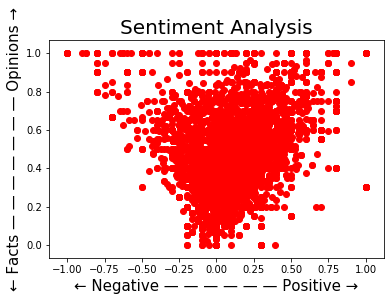

CPU times: user 1min 19s, sys: 817 ms, total: 1min 20s
Wall time: 1min 20s


In [32]:
%%time
for index, Tweets in enumerate(df.index):
    x = df.polarity.loc[Tweets]
    y = df.subjectivity.loc[Tweets]
    plt.scatter(x, y, color='Red')


plt.title('Sentiment Analysis', fontsize = 20)
plt.xlabel('← Negative — — — — — — Positive →', fontsize=15)
plt.ylabel('← Facts — — — — — — — Opinions →', fontsize=15)
plt.show()